In [1]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
plt.rcParams['image.cmap'] = 'gist_earth'
np.random.seed(98765)

In [2]:
from tf_unet import image_gen
from tf_unet import unet
from tf_unet import util

In [3]:
nx = 572
ny = 572


In [4]:
generator = image_gen.GrayScaleDataProvider(nx, ny, cnt=20)

In [16]:
x_test, y_test = generator(1)
print(np.shape(x_test))
print(np.shape(y_test))
print(x_test[0][100][100])
print(y_test[0][100][100])

(1, 572, 572, 1)
(1, 572, 572, 2)
[0.15183156]
[1. 0.]


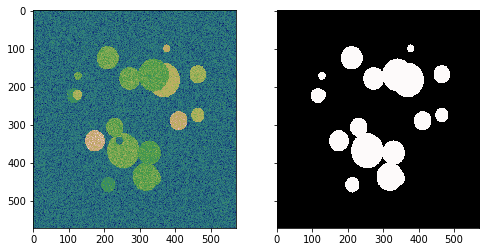

In [9]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,4))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")

In [10]:
net = unet.Unet(channels=generator.channels, n_class=generator.n_class, layers=3, features_root=16)

2019-05-07 23:37:16,709 Layers 3, features 16, filter size 3x3, pool size: 2x2


Instructions for updating:
Colocations handled automatically by placer.


2019-05-07 23:37:16,737 From /Users/nsemsarilar/code/dl/venv_tfunet/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


2019-05-07 23:37:16,765 From /Users/nsemsarilar/.local/lib/python3.7/site-packages/tf_unet-0.1.2-py3.7.egg/tf_unet/layers.py:39: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
trainer = unet.Trainer(net, optimizer="momentum", opt_kwargs=dict(momentum=0.2))

In [12]:
path = trainer.train(generator, "./unet_trained", training_iters=32, epochs=10, display_step=2)

2019-05-07 23:37:23,341 Removing '/Users/nsemsarilar/code/dl/tf_unet/demo/prediction'
2019-05-07 23:37:23,354 Removing '/Users/nsemsarilar/code/dl/tf_unet/demo/unet_trained'
2019-05-07 23:37:23,356 Allocating '/Users/nsemsarilar/code/dl/tf_unet/demo/prediction'
2019-05-07 23:37:23,358 Allocating '/Users/nsemsarilar/code/dl/tf_unet/demo/unet_trained'
2019-05-07 23:37:28,987 Verification error= 47.4%, loss= 0.6930
2019-05-07 23:37:29,638 Start optimization
2019-05-07 23:37:33,558 Iter 0, Minibatch Loss= 0.6529, Training Accuracy= 0.7817, Minibatch error= 21.8%
2019-05-07 23:37:39,567 Iter 2, Minibatch Loss= 0.5719, Training Accuracy= 0.8608, Minibatch error= 13.9%
2019-05-07 23:37:46,405 Iter 4, Minibatch Loss= 0.5187, Training Accuracy= 0.8591, Minibatch error= 14.1%
2019-05-07 23:37:53,419 Iter 6, Minibatch Loss= 0.4877, Training Accuracy= 0.8457, Minibatch error= 15.4%
2019-05-07 23:38:00,242 Iter 8, Minibatch Loss= 0.4248, Training Accuracy= 0.8776, Minibatch error= 12.2%
2019-05-07 

KeyboardInterrupt: 

In [18]:
x_test, y_test = generator(1)

prediction = net.predict("./unet_trained/model.ckpt", x_test)

Instructions for updating:
Use standard file APIs to check for files with this prefix.


2019-05-08 00:54:26,031 From /Users/nsemsarilar/code/dl/venv_tfunet/lib/python3.7/site-packages/tensorflow/python/training/saver.py:1266: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


INFO:tensorflow:Restoring parameters from ./unet_trained/model.ckpt


2019-05-08 00:54:26,039 Restoring parameters from ./unet_trained/model.ckpt
2019-05-08 00:54:26,170 Model restored from file: ./unet_trained/model.ckpt


(1, 572, 572, 1)
(1, 572, 572, 2)
(1, 532, 532, 2)


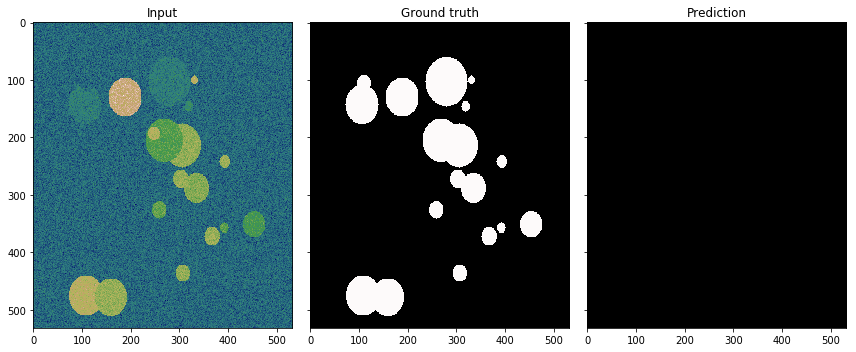

In [19]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")
mask = prediction[0,...,1] > 0.9
print(np.shape(x_test))
print(np.shape(y_test))
print(np.shape(prediction))

ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")
fig.tight_layout()
fig.savefig("../docs/toy_problem.png")